# Оценка маркетинговых Кампаний

## Задание

**Вводные:**  

В рамках 2х кампаний целевого маркетинга (CRM-кампании) абонентам за выполнение целевого действия (пополнение счета на сумму X)  в подарок давались Y МБ (Кампания 1 и Кампания 2: X и Y в кампаниях одинаковый). Необходимо оценить эффективность проведенных кампаний.

**Задачи:**  

1. Предложите вариант оценки эффективности кампаний целевого маркетинга (Кампания 1 и Кампания 2);
2. Сравните результаты 2х кампаний и скажите какая из кампаний оказалась более эффективной;
3. При необходимости перечислите данные, которые Вы считаете необходимыми для оценки целевых маркетинговых кампании (но они не были представлены в предложенном списке).

**Расшифровка показателей:**

**ID** - ID абонента  
**id_campaign** -  Название CRM кампании  
**cg_flag** - Флаг принадлежности к контрольной группе  
**target** -	Совершение целевого действия (отклик на кампанию)  
**Начисления, M0** -	Все начисления аб-та в месяце ДО проведения кампании  
**Начисления, M1** -	Все начисления аб-та в месяце проведения кампании  
**Начисления, M2** -	Все начисления аб-та в месяце ПОСЛЕ проведения кампании  
**Начисления интернет, M0** -	Начисления аб-та за интеренет в месяце ДО проведения кампании  
**Начисления интернет, M1** -	Начисления аб-та за интеренет в месяце проведения кампании  
**Начисления интернет, M2** -	Начисления аб-та за интеренет в месяце ПОСЛЕ проведения кампании  
**ТП** -	Тарифный план  
**ТИП ТП** -	Тип ТП  
**Интернет трафик, МБ, M0**	- Объем потребленных МБ в месяце ДО проведения кампании  
**Интернет трафик, МБ, M1** -	Объем потребленных МБ в месяце проведения кампании  
**Интернет трафик, МБ, M2** -	Объем потребленных МБ в месяце ПОСЛЕ проведения кампании  


##  Решение

Напишем вспомогательные функции

In [1]:
import sys; print(sys.version)
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display
import warnings
warnings.simplefilter("ignore")

3.7.8 | packaged by conda-forge | (default, Jul 31 2020, 02:25:08) 
[GCC 7.5.0]


In [2]:
#определим цвет для текстов
class color:
   PURPLE = '\033[95m'
   CYAN = '\033[96m'
   DARKCYAN = '\033[36m'
   BLUE = '\033[94m'
   GREEN = '\033[92m'
   YELLOW = '\033[93m'
   RED = '\033[91m'
   BOLD = '\033[1m'
   UNDERLINE = '\033[4m'
   END = '\033[0m'

In [3]:
#функция ислледовательского анализа
def display_info(name, head, tail, shape, info, nan, describe, duplicate, unique, corr, corr_map):
    #**Функция print_basic_info, для вывода информации о массиве, и его переменных.**

    #* name - название базы данных
    #* head - n: вывод примера базы (вывод n - строк), n = 0: не вывод
    #* tail - n: вывод примера базы (вывод n - строк), n = 0: не вывод
    #* shape - 1: вывод информаии о размерах датасета,  другое: не вывод
    #* info - 1: вывод информации о массиве, другое: не вывод
    #* nan - 1: вывод информации количестве пропусков, другое: не вывод
    #* describe - 1: вывод описания переменных массива, другое: не вывод   
                  #Возвращает транспонированный describe()
                  #Добавляет строку с долей пропусков для каждого столбца
    #* duplicate - 1: вывод количества полных дублей
    #* unique - 1: вывод количества неуникальных значений, другое: не вывод
    #* corr - 1: вывод цоэффициентов корреляции, другое: не вывод
    
    if head >= 1:
        print("\n", color.BOLD + color.RED + 'HEAD' + color.END, "\n")
        display(name.head(head))
    if tail >= 1:
        print("\n", color.BOLD + color.RED + 'TAIL' + color.END, "\n")
        display(name.tail(tail))
    if shape == 1:
        print("\n", color.BOLD + color.RED + 'SHAPE' + color.END, "\n")
        display(name.shape)
    if info == 1:
        print("\n", color.BOLD + color.RED + 'INFO' + color.END, "\n")
        display(name.info())
    if nan == 1:
        print("\n", color.BOLD + color.RED + 'Пустые ячейки, %' + color.END, "\n")
        display(round(name.isna().sum()/name.shape[0]*100, 2))
    if unique == 1:
        print("\n", color.BOLD + color.RED + 'Уникальные значения' + color.END, "\n")
        display(name.nunique())
    if describe == 1:
        print("\n", color.BOLD + color.RED + 'Статистики' + color.END, "\n")
        display(round(name.describe().transpose(), 2))
    if duplicate == 1:
        print("\n", color.BOLD + color.RED + 'Полностью дублирущие строки' + color.END, "\n")
        display(name[name.duplicated() == True][name.columns[0]].count())
    if corr == 1:
        print("\n", color.BOLD + color.RED + 'CORR' + color.END, "\n")
        display(name.corr())
    if corr_map != 'None':
        print("\n", color.BOLD + color.RED + 'CORR_MAP' + color.END, "\n")
        display(sns.heatmap(name.corr(), vmin = corr_map))

### Первый взгляд на данные

In [4]:
file = 'test_2.xlsx'
df = pd.read_excel(file)
display(df.head(10))

,id_client,id_campaign,cg_flag,target,charges_before,charges_during,charges_after,internet_charges_before,internet_charges_during,internet_charges_after,tariff,tariff_type,mb_before,mb_during,mb_after
0,1,Кампания 1,0,0,6.5185,6.3978,4.6045,4.5785,2.3378,0.4345,2,4,68.314352,59.351113,51.737704
1,2,Кампания 1,0,0,5.8547,4.4119,4.8067,2.8539,3.9119,3.9092,12,4,579.010512,492.801193,342.518164
2,3,Кампания 1,0,0,6.2981,7.8600,11.6697,0.0000,0.0000,0.0000,17,1,196.292374,246.101669,199.698750
3,4,Кампания 1,0,0,5.2881,5.7200,9.4497,0.0000,0.0000,0.0000,17,1,165.793745,83.200476,247.641807
4,5,Кампания 1,0,0,6.2702,10.2957,1.4800,3.8102,4.3057,0.2000,2,4,2732.381782,2164.659832,1133.383774
5,6,Кампания 1,0,0,4.6313,4.5630,4.8811,1.5655,1.5630,1.5654,12,4,173.923490,796.755230,898.732374
6,7,Кампания 1,1,0,5.1781,4.9400,10.1897,0.0000,0.0000,0.0000,17,1,43.805752,0.000000,0.026571
7,8,Кампания 1,1,0,6.9781,5.6600,8.1396,0.0000,0.0000,0.0000,17,1,68.137033,47.287868,94.667454
8,9,Кампания 1,0,0,6.3681,6.6900,6.6698,0.0000,0.0000,0.0000,17,1,15.102535,1.415285,201.116551
9,10,Кампания 1,0,1,5.8181,17.4600,9.5296,0.0000,0.0000,0.0000,17,1,175.835971,20.256527,10.670056


In [5]:
#посмотрим на данные разными способами
display_info(name=df,  head=0, tail=5, shape=1, info=1, nan=1, describe=1, duplicate=1, unique=1, corr=0, corr_map='None')


 TAIL 



,id_client,id_campaign,cg_flag,target,charges_before,charges_during,charges_after,internet_charges_before,internet_charges_during,internet_charges_after,tariff,tariff_type,mb_before,mb_during,mb_after
19995,19996,Кампания 2,0,0,7.2237,3.8330,5.5003,0.0,0.0,0.0,17,1,152.950129,33.079299,191.037156
19996,19997,Кампания 2,0,0,4.7725,10.2663,20.1683,0.0,3.0,10.0,17,1,149.570430,518.515047,4772.710760
19997,19998,Кампания 2,0,0,2.5049,6.4368,5.9959,0.0,0.0,0.0,17,1,0.000000,75.400037,225.731570
19998,19999,Кампания 2,0,0,5.1444,12.6580,13.6714,0.0,0.0,0.0,8,1,21.582489,39.019189,81.871427
19999,20000,Кампания 2,1,0,5.0280,11.8914,20.8213,0.0,0.0,7.0,8,1,1318.850963,899.400355,1805.424911



 SHAPE 



(20000, 15)


 INFO 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 15 columns):
id_client                  20000 non-null int64
id_campaign                20000 non-null object
cg_flag                    20000 non-null int64
target                     20000 non-null int64
charges_before             20000 non-null float64
charges_during             19797 non-null float64
charges_after              19309 non-null float64
internet_charges_before    20000 non-null float64
internet_charges_during    19797 non-null float64
internet_charges_after     19309 non-null float64
tariff                     20000 non-null int64
tariff_type                20000 non-null int64
mb_before                  20000 non-null float64
mb_during                  19435 non-null float64
mb_after                   18990 non-null float64
dtypes: float64(9), int64(5), object(1)
memory usage: 2.3+ MB


None


 Пустые ячейки, % 



id_client                  0.00
id_campaign                0.00
cg_flag                    0.00
target                     0.00
charges_before             0.00
charges_during             1.01
charges_after              3.45
internet_charges_before    0.00
internet_charges_during    1.01
internet_charges_after     3.45
tariff                     0.00
tariff_type                0.00
mb_before                  0.00
mb_during                  2.82
mb_after                   5.05
dtype: float64


 Уникальные значения 



id_client                  20000
id_campaign                    2
cg_flag                        2
target                         2
charges_before             10961
charges_during             11440
charges_after              11603
internet_charges_before     2594
internet_charges_during     2772
internet_charges_after      2723
tariff                        18
tariff_type                    3
mb_before                  17825
mb_during                  17015
mb_after                   16311
dtype: int64


 Статистики 



,count,mean,std,min,25%,50%,75%,max
id_client,20000.0,10000.50,5773.65,1.0,5000.75,10000.50,15000.25,20000.00
cg_flag,20000.0,0.12,0.33,0.0,0.00,0.00,0.00,1.00
target,20000.0,0.07,0.26,0.0,0.00,0.00,0.00,1.00
charges_before,20000.0,5.57,2.04,0.0,4.51,5.35,6.65,20.68
charges_during,19797.0,6.82,4.23,0.0,4.70,6.04,8.39,143.54
charges_after,19309.0,7.16,4.94,0.0,4.84,6.12,9.22,139.79
internet_charges_before,20000.0,0.67,1.47,0.0,0.00,0.00,0.50,15.00
internet_charges_during,19797.0,0.94,2.70,0.0,0.00,0.00,0.94,138.20
internet_charges_after,19309.0,1.04,3.22,0.0,0.00,0.00,1.05,133.43
tariff,20000.0,10.26,6.30,1.0,2.00,8.00,17.00,18.00



 Полностью дублирущие строки 



0

In [6]:
print("\n", color.BOLD + color.GREEN + 'Количество абонентов в каждой кампании' + color.END, "\n")
df['id_campaign'].value_counts()


 Количество абонентов в каждой кампании 



Кампания 1    10000
Кампания 2    10000
Name: id_campaign, dtype: int64

**И так, что мы уведели при первом знакомстве с данными:**
* количество уникальных клиентов - 20000, у каждой кампании одинаковое количество абонентов (по 10000), т.е. каждый клиент участвовал только в одной кампании;  
* есть незаполненные ячейки в разных столбцах, их природа по заданию не уточнена и нам неизвестна, мы можеи только делать предположения на их счет;
  - так, например, есть одинаковое количество незаполненных ячеек в столбцах общих начислений и начислений за интернет во втором и третьем месяцах, возможно это связано с тем, что абонент перестал пользоваться услугами оператора;
  - а вот количество пустых значений в столбцах используемого трафика больше количества пустых значений в столбцах начислений за интернет, поэтому можно лишь догадываться как повел себя абонент, не использовал вообще трафик и ячейку необходимо заполнить нулем, либо он ушел от оператора и ячейку необходимо оставить пустой;
* считаю, что количество пустых ячеек для разных показателей одного периода должны быть равны, поэтому заполним столбецы количества используемых мегабайт во время акции и после нулями там, где стоят соотвественно нули по начислениям;
* также мы видим, что рассмотрены 18 тарифных планов и они относятся к 3 различным типам тарифных планов; пока не вижу как можно их использовать для оценки эффективности кампаний

**Заменим все пустые значения на нули**

In [7]:
df.loc[df['charges_after'] >= 0, 'mb_after'] = df['mb_after'].fillna(0)
df.loc[df['charges_during'] >= 0, 'mb_during'] = df['mb_during'].fillna(0)

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 15 columns):
id_client                  20000 non-null int64
id_campaign                20000 non-null object
cg_flag                    20000 non-null int64
target                     20000 non-null int64
charges_before             20000 non-null float64
charges_during             19797 non-null float64
charges_after              19309 non-null float64
internet_charges_before    20000 non-null float64
internet_charges_during    19797 non-null float64
internet_charges_after     19309 non-null float64
tariff                     20000 non-null int64
tariff_type                20000 non-null int64
mb_before                  20000 non-null float64
mb_during                  19797 non-null float64
mb_after                   19309 non-null float64
dtypes: float64(9), int64(5), object(1)
memory usage: 2.3+ MB


In [8]:
print("\n", color.BOLD + color.GREEN + 'Количество абонентов в каждой кампании' + color.END, "\n")
df.pivot_table(index = ['id_campaign', 'cg_flag'],
               values = ['charges_before', 'charges_during', 'charges_after'],
               aggfunc='count')


 Количество абонентов в каждой кампании 



charges_after  charges_before  charges_during
id_campaign cg_flag                                               
Кампания 1  0                 8157            8520            8358
            1                 1395            1480            1445
Кампания 2  0                 8800            9014            9010
            1                  957             986             984

**- Количество абонентов в рамках одной кампании по видам групп отличается от месяца к месяцу, поэтому оценку эффективности кампаний необходимо проводить по средним значениям показателей**

Рассчитаем дополнительные значения сумм за 3 месяца для каждого показателя

In [9]:
df['charges_sum'] = df[['charges_before', 'charges_during', 'charges_after']].sum(axis=1)
df['internet_charges_sum'] = df[['internet_charges_before', 'internet_charges_during', 'internet_charges_after']].sum(axis=1)
df['mb_sum'] = df[['mb_before', 'mb_during', 'mb_after']].sum(axis=1)
display(df.head())

,id_client,id_campaign,cg_flag,target,charges_before,charges_during,charges_after,internet_charges_before,internet_charges_during,internet_charges_after,tariff,tariff_type,mb_before,mb_during,mb_after,charges_sum,internet_charges_sum,mb_sum
0,1,Кампания 1,0,0,6.5185,6.3978,4.6045,4.5785,2.3378,0.4345,2,4,68.314352,59.351113,51.737704,17.5208,7.3508,179.403170
1,2,Кампания 1,0,0,5.8547,4.4119,4.8067,2.8539,3.9119,3.9092,12,4,579.010512,492.801193,342.518164,15.0733,10.6750,1414.329869
2,3,Кампания 1,0,0,6.2981,7.8600,11.6697,0.0000,0.0000,0.0000,17,1,196.292374,246.101669,199.698750,25.8278,0.0000,642.092793
3,4,Кампания 1,0,0,5.2881,5.7200,9.4497,0.0000,0.0000,0.0000,17,1,165.793745,83.200476,247.641807,20.4578,0.0000,496.636027
4,5,Кампания 1,0,0,6.2702,10.2957,1.4800,3.8102,4.3057,0.2000,2,4,2732.381782,2164.659832,1133.383774,18.0459,8.3159,6030.425387


Разобьем данные на 2 таблицы по признаку  id_campaign

In [10]:
df_1 = df.query('id_campaign == "Кампания 1"')
df_2 = df.query('id_campaign == "Кампания 2"')

In [11]:
#подготовим функцию для построения графиков
def hist_box(df1, df2, column, n_bins):
    plt.figure(figsize=(15, 10))
    plt.subplot(2, 2, 1)
    plt.hist(df1.query('cg_flag == 0')[column], bins = n_bins,
             density=True,alpha = 1,
             label='Тестовая группа')
    plt.hist(df1.query('cg_flag == 1')[column], bins = n_bins,
             density=True,alpha = 0.5,
             label='Контрольная группа')
    plt.legend()
    plt.title('Кампания 1') # заголовок
    plt.grid(True)
    
    plt.subplot(2, 2, 3)
    plt.boxplot(df1[column], vert=False)
    plt.grid(True)
    

    plt.subplot(2, 2, 2)
    plt.hist(df2.query('cg_flag == 0')[column], bins = n_bins,
             density=True, alpha = 1,
             label='Тестовая группа')
    plt.hist(df2.query('cg_flag == 1')[column], bins = n_bins,
             density=True, alpha = 0.5,
             label='Контрольная группа')
    plt.title('Кампания 2')
    plt.legend()
    plt.grid(True)
    
    plt.subplot(2, 2, 4)
    plt.boxplot(df2[column], vert=False)
    plt.grid(True)
    
    plt.suptitle(column)
    plt.show()

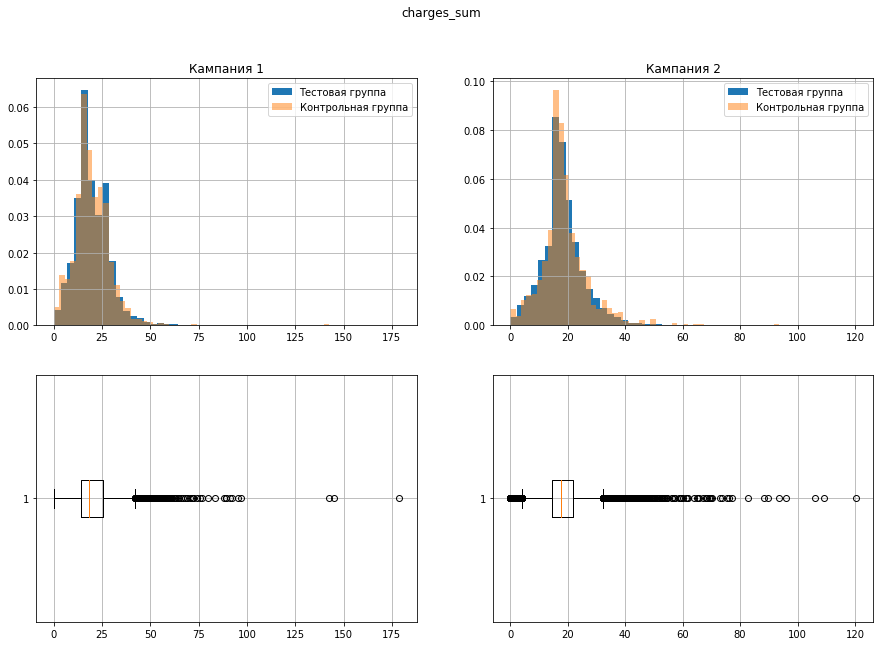

In [12]:
hist_box(df_1, df_2, 'charges_sum', n_bins=50)
#.query('charges_sum < 10000')

* Значения начислений у обоих Кампаний имеет нормальное распределение 
* Медианы значений в двух Кампаниях практически одинаковы
* В Кампании 1 выше максимальное значение начислений и имеются две пики, это говорит о том, что средняя сумма общих начислений за 3 месяца у Кампании 1 будет выше, возможно именно она окажется более эффективной в сравнении

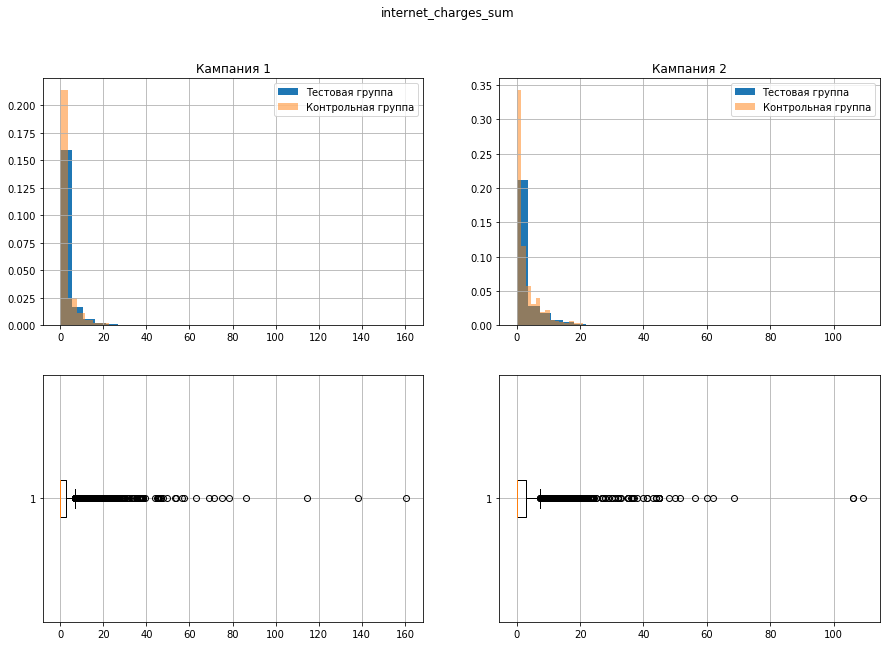

In [13]:
hist_box(df_1,
         df_2, 'internet_charges_sum', n_bins=30)
#.query('internet_charges_sum < 10000')

* По распределению суммарных начислений за интернет за 3 месяца можно судить о большом количестве нулевых значений начислений за интернет

###  Оценка эффективности каждой кампании

Оценку эффективности кампаний предлагаю проводить по следующим показателям:
* 

**Оценку эффективности кампаний предлагаю проводить по следующим показателям:**
1. Среднее значение общих начислений за 3 месяца
2. Прирост средних значений по всем показателям помесячно
3. Средние значения начислений по абонентам, совершившим целевое действие

Сравнивать будем по принадлежности к группам

####  Оценка Кампинии 1

Подготовим необходимые данные для анализа

In [14]:
def stat_campaign(data):
    data['gb_before'] = data['mb_before'] / 1000
    data['gb_during'] = data['mb_during'] / 1000
    data['gb_after'] = data['mb_after'] / 1000
    data['gb_sum'] = data[['gb_before', 'gb_during', 'gb_after']].sum(axis=1)
    
    data_agg = data.pivot_table(index='cg_flag',
                               #columns = 'cg_flag',
                               values=['charges_before', 'charges_during', 'charges_after', 'internet_charges_before',
           'internet_charges_during', 'internet_charges_after', 'gb_before', 'gb_during', 'gb_after',  'charges_sum',
           'internet_charges_sum', 'gb_sum'],
                               aggfunc=['sum','mean']
                               )
    data_agg.columns = ["_".join((j,k)) for j,k in data_agg.columns]    
    return data_agg

In [15]:
df_1_agr = stat_campaign(df_1)
df_1_agr.transpose()

cg_flag,0,1
sum_charges_after,63241.047532,10772.524690
sum_charges_before,47875.780255,8367.006700
sum_charges_during,59376.939982,10139.037427
sum_charges_sum,170493.767769,29278.568817
sum_gb_after,8931.140949,718.402267
sum_gb_before,7938.561253,909.093510
sum_gb_during,8832.312799,788.390732
sum_gb_sum,25702.015000,2415.886509
sum_internet_charges_after,8390.629448,1331.278552
sum_internet_charges_before,4827.066984,853.414394


**1. Среднее значение общих начислений за 3 месяца**

In [16]:
a = df_1.pivot_table(index = ['cg_flag'],
               values = ['charges_before',
       'charges_during', 'charges_after'],
               aggfunc='mean')
a['mean'] = (a['charges_before'] + a['charges_during'] + a['charges_after'])/3
display(a)


,charges_after,charges_before,charges_during,mean
cg_flag,,,,
0,7.752979,5.619223,7.104204,6.825469
1,7.722240,5.653383,7.016635,6.797419


**Среднемесячные начисления на одного абонента выше у тестовой группы, но незначительно**

**2. Прирост средних значений по всем показателям помесячно**

Результат расчетов загрузим из файла excel

In [17]:
file_2 = 'analyse_test2.xlsx'
df_analyse_1 = pd.read_excel(file_2, sheet_name='Кампания 1')
df_analyse_2 = pd.read_excel(file_2, sheet_name='Кампания 2')
df_analyse_1.drop(['Тестовая', 'Контрольная '], axis=1,  inplace=True)
df_analyse_2.drop(['Тестовая', 'Контрольная '], axis=1,  inplace=True)
df_analyse_1 = df_analyse_1.round(2)
df_analyse_2 = df_analyse_2.round(2)

In [18]:
display(df_analyse_1)

,Показатель,Отношение месяцев,Прирост Тестовая,Прирост Контрольная,Разница тестовой и контрольной
0,sum_charges,2/1,24.02,21.18,2.84
1,sum_charges,3/2,6.51,6.25,0.26
2,sum_charges,3/1,32.09,28.75,3.34
3,sum_gb,2/1,11.26,-13.28,24.54
4,sum_gb,3/2,1.12,-8.88,10.00
5,sum_gb,3/1,12.50,-20.98,33.48
6,sum_internet_charges,2/1,58.61,56.44,2.17
7,sum_internet_charges,3/2,9.59,-0.28,9.87
8,sum_internet_charges,3/1,73.82,55.99,17.83
9,mean_charges,2/1,26.43,24.11,2.31


Отфильтруем те разницы, между тестовой и контрольной группами, которые получились отрцательными, т.е. случаи, когда контрольная группа показала себя лучше

In [19]:
df_analyse_1.loc[df_analyse_1['Разница тестовой и контрольной'] <= 0]

,Показатель,Отношение месяцев,Прирост Тестовая,Прирост Контрольная,Разница тестовой и контрольной
10,mean_charges,3/2,9.13,10.06,-0.92


* Основной вывод, который можно сделать глядя на результаты, - Кампания 1 оказалась эффективной.
* По результатм расчетов показателей Кампании 1, тестовая группа абонентов, которая была проинформирована о проведении акции показала себя с лучшей стороны, так как большинство показателей оказались выше, чем у контрольной.
* Тестовая группа просела по среднему общих начислений абонента после акции, однако незначительно всего на 0.9 п.п., что с одной стороны свидетельствует о том, что акция работала и после абоненты стали менее активны, с ругой  стороны - это сигнал о том, что за этим поазателем необходимо проследить вдальнейшем. Говорить об отрицательном результате пока рано.
* А вот прирост средних значений интернет-начислений у тестовой группы за 3 месяца значительно увеличилось (33,67 п.п.), т.е. с  учетом практически одинакового значения средних общих начислений различия у групп без проведения акции средние общие начисления  бы просели.

**3. Средние значения начислений по абонентам, совершившим целевое действие**

In [20]:
df_1_target = stat_campaign(df_1.query('target==1'))
df_1_target.transpose()

cg_flag,0,1
sum_charges_after,6860.999794,730.988400
sum_charges_before,4481.370029,513.420900
sum_charges_during,6572.186102,744.436200
sum_charges_sum,17914.555925,1988.845500
sum_gb_after,692.368161,30.560089
sum_gb_before,514.846162,23.929974
sum_gb_during,682.663284,29.903460
sum_gb_sum,1889.877608,84.393523
sum_internet_charges_after,1023.547255,135.245900
sum_internet_charges_before,307.025526,39.771700


**Интересно, что для группы абонентов совершивших целевое действие и не знавших об акции все средние показатели выше, чем у тестовой группы. Посмотрим на прирост показателей**

In [21]:
file_2 = 'analyse_test2.xlsx'
df_analyse_target_1 = pd.read_excel(file_2, sheet_name='target_1')
df_analyse_target_2 = pd.read_excel(file_2, sheet_name='target_2')
df_analyse_target_1.drop(['Тестовая', 'Контрольная '], axis=1,  inplace=True)
df_analyse_target_2.drop(['Тестовая', 'Контрольная '], axis=1,  inplace=True)
df_analyse_target_1 = df_analyse_target_1.round(2)
df_analyse_target_2 = df_analyse_target_2.round(2)

In [22]:
df_analyse_target_1

,Показатель,Отношение месяцев,Прирост Тестовая,Прирост Контрольная,Разница тестовой и контрольной
0,sum_charges_after,2/1,46.66,45.00,1.66
1,sum_charges_before,3/2,4.39,-1.81,6.20
2,sum_charges_during,3/1,53.10,42.38,10.72
3,sum_gb_after,2/1,32.60,24.96,7.63
4,sum_gb_before,3/2,1.42,2.20,-0.77
5,sum_gb_during,3/1,34.48,27.71,6.77
6,sum_internet_charges_after,2/1,205.30,356.66,-151.36
7,sum_internet_charges_before,3/2,9.19,-25.53,34.73
8,sum_internet_charges_during,3/1,233.38,240.06,-6.68
9,mean_charges_after,2/1,46.87,45.00,1.87


* Однако прирост показателей тестовой группы, совершившей целевое действие, все же выше по показателю средних общих начислений.
* Аномалией для меня, которая нуждается в более подробном анализе, является сильно превышающее значение средних начислений за интернет контрольной группы, которая не знала о проведении кампании, но совершила целевое действие.

#### Вывод

По итогу анализа Кампании 1, можно утверждать что она показала себя с эффективной стороны. Так как по различным показателям тестовая группа показывала лучшие значения средних и прироста показателей

####  Оценка Кампинии 2

**1. Среднее значение общих начислений за 3 месяца**

In [23]:
a = df_2.pivot_table(index = ['cg_flag'],
               values = ['charges_before',
       'charges_during', 'charges_after'],
               aggfunc='mean')
a['mean'] = (a['charges_before'] + a['charges_during'] + a['charges_after'])/3
display(a)


,charges_after,charges_before,charges_during,mean
cg_flag,,,,
0,6.556177,5.517237,6.520834,6.198083
1,6.865309,5.436864,6.892039,6.398071


**Среднемесячные начисления на одного абонента выше у контрольной группы, но незначительно**

**2. Прирост средних значений по всем показателям помесячно**

Рассчитаем средние значения и посмотрим на абсолютную разницу помесячно

In [24]:
df_2_agr = stat_campaign(df_2)
df_2_agr = df_2_agr.transpose()
df_2_agr['diff'] = df_2_agr[0] - df_2_agr[1] 
df_2_agr.round(2)

cg_flag,0,1,diff
sum_charges_after,57694.35,6570.10,51124.25
sum_charges_before,49732.37,5360.75,44371.62
sum_charges_during,58752.72,6781.77,51970.95
sum_charges_sum,166179.45,18712.62,147466.83
sum_gb_after,6554.44,680.89,5873.56
sum_gb_before,7904.45,1057.46,6846.99
sum_gb_during,9530.03,1183.16,8346.87
sum_gb_sum,23988.93,2921.51,21067.41
sum_internet_charges_after,9338.59,938.86,8399.72
sum_internet_charges_before,6951.53,728.67,6222.86


**Наблюдается общая тенденция лучших результатов у тестовой группы в месяце до проведения акции. В месяцах во время и после проведения акции средние показатели у группы, которая не знала об акции (контрольной), незначительно выше**

Результат расчетов помесячного прироста загрузим из файла excel

In [25]:
display(df_analyse_2)

,Показатель,Отношение месяцев,Прирост Тестовая,Прирост Контрольная,Разница тестовой и контрольной
0,sum_charges,2/1,18.14,26.51,-8.37
1,sum_charges,3/2,-1.80,-3.12,1.32
2,sum_charges,3/1,16.01,22.56,-6.55
3,sum_gb,2/1,20.57,11.89,8.68
4,sum_gb,3/2,-31.22,-42.45,11.23
5,sum_gb,3/1,-17.08,-35.61,18.53
6,sum_internet_charges,2/1,25.45,35.89,-10.44
7,sum_internet_charges,3/2,7.08,-5.18,12.27
8,sum_internet_charges,3/1,34.34,28.85,5.49
9,mean_charges,2/1,18.19,26.76,-8.57


Отфильтруем те разницы, между тестовой и контрольной группами, которые получились отрцательными, т.е. случаи, когда контрольная группа показала себя лучше

In [26]:
df_analyse_2.loc[df_analyse_2['Разница тестовой и контрольной'] <= 0]

,Показатель,Отношение месяцев,Прирост Тестовая,Прирост Контрольная,Разница тестовой и контрольной
0,sum_charges,2/1,18.14,26.51,-8.37
2,sum_charges,3/1,16.01,22.56,-6.55
6,sum_internet_charges,2/1,25.45,35.89,-10.44
9,mean_charges,2/1,18.19,26.76,-8.57
11,mean_charges,3/1,18.83,26.27,-7.44
15,mean_internet_charges,2/1,25.51,36.17,-10.66


**Выводы**
 
* Основной вывод, который можно сделать глядя на результаты, - Кампания 2 оказалась недостаточно эффективной.
* По результатм расчетов показателей Кампании 2, тестовая группа абонентов, которая была проинформирована о проведении акции показала себя хуже, так как большинство важных показателей оказались ниже, чем у контрольной (прирост средней значения общих начислений).
* Отличительно то, что прирост средних значений интернет-начислений у тестовой группы в месяце проведения кампании уменьшился (на 10,66 п.п.), а в месяце после проведения акции увеличился

**3. Средние значения начислений по абонентам, совершившим целевое действие**

In [27]:
df_2_target = stat_campaign(df_2.query('target==1'))
df_2_target = df_2_target.transpose()
df_2_target['diff'] = df_2_target[0] - df_2_target[1] 
df_2_target.round(2)


cg_flag,0,1,diff
sum_charges_after,5129.70,453.64,4676.06
sum_charges_before,4252.19,318.98,3933.21
sum_charges_during,5229.68,457.10,4772.58
sum_charges_sum,14611.57,1229.72,13381.84
sum_gb_after,560.66,16.50,544.16
sum_gb_before,539.35,12.76,526.60
sum_gb_during,869.27,17.64,851.63
sum_gb_sum,1969.28,46.89,1922.39
sum_internet_charges_after,830.22,57.75,772.46
sum_internet_charges_before,634.27,39.50,594.77


**Средние значения общих начислений у контрольной группы, не знавшей о кампании и совершивших целевое действие выше, потребление интернет трафика ниже, но начисления за интернет выше. Вдальнейшем посмотрим какие тарифные планы действоваи у разных групп абонентов, может причина в них**

In [28]:
df_analyse_target_2

,Показатель,Отношение месяцев,Прирост Тестовая,Прирост Контрольная,Разница тестовой и контрольной
0,sum_charges_after,2/1,22.99,43.30,-20.31
1,sum_charges_before,3/2,-1.91,-0.76,-1.15
2,sum_charges_during,3/1,20.64,42.22,-21.58
3,sum_gb_after,2/1,61.17,38.22,22.95
4,sum_gb_before,3/2,-35.50,-6.45,-29.05
5,sum_gb_during,3/1,3.95,29.30,-25.35
6,sum_internet_charges_after,2/1,11.91,30.47,-18.56
7,sum_internet_charges_before,3/2,16.96,12.06,4.90
8,sum_internet_charges_during,3/1,30.89,46.21,-15.32
9,mean_charges_after,2/1,22.99,43.30,-20.31


* Прирост показателей тестовой группы, совершившей целевое действие, все же нижепрактически по всем средним

#### Вывод

По итогу анализа Кампании 2, можно утверждать, что она показала себя с неэффективной стороны. Так как по различным показателям контрольная группа показывала лучшие значения средних и прироста показателей

###  Анализ дополнительных показателей

In [29]:
b0 = df.query('target == 0 and id_campaign == "Кампания 1"').groupby(['cg_flag', 
                                     'tariff_type' ]).agg({'tariff_type':
                                                'count'})
b1 = df.query('target == 1 and id_campaign == "Кампания 1"').groupby(['cg_flag', 
                                     'tariff_type' ]).agg({'tariff_type':
                                                'count'})
aa0 = b0.groupby(level=0).apply(lambda x: 100 * x / float(x.sum()))
aa1 = b1.groupby(level=0).apply(lambda x: 100 * x / float(x.sum()))
qwe = pd.concat([aa0, aa1], axis=1)
qwe.columns = ['target_0', 'target_1']
print("\n", color.BOLD + color.GREEN + 'Доля типов тарифных планов для Кампании 1' + color.END, "\n")
display(qwe.round(1))

a0 = df.query('target == 0 and id_campaign == "Кампания 2"').groupby(['cg_flag', 
                                     'tariff_type' ]).agg({'tariff_type':
                                                'count'})
a1 = df.query('target == 1 and id_campaign == "Кампания 2"').groupby(['cg_flag', 
                                     'tariff_type' ]).agg({'tariff_type':
                                                'count'})
bb0 = a0.groupby(level=0).apply(lambda x: 100 * x / float(x.sum()))
bb1 = a1.groupby(level=0).apply(lambda x: 100 * x / float(x.sum()))
zxc = pd.concat([bb0, bb1], axis=1)
zxc.columns = ['target_0', 'target_1']
print("\n", color.BOLD + color.GREEN + 'Доля типов тарифных планов для Кампании 2' + color.END, "\n")
display(zxc.round(1))


 Доля типов тарифных планов для Кампании 1 



target_0  target_1
cg_flag tariff_type                    
0       1                70.4      76.8
        2                 0.0       NaN
        4                29.6      23.2
1       1                70.8      76.7
        4                29.2      23.3


 Доля типов тарифных планов для Кампании 2 



target_0  target_1
cg_flag tariff_type                    
0       1                53.5      53.2
        2                 0.1       NaN
        4                46.5      46.8
1       1                56.6      64.6
        4                43.4      35.4

* *Напомним, что мы нашли небольшую аномалию Кампании 1: превышающее значение средних начислений за интернет контрольной группы, которая не знала о проведении кампании, но совершила целевое действие* - по доле типов тарифов пока не видно на какой тариф обратить внимание
* *А вот аномалия Кампании 2: у контрольной группы, не знавшей о кампании и совершивших целевое действие, потребление интернет трафика ниже, но начисления за интернет выше.* - возможно стоит обратить внимание на первый тип тарифов.

In [30]:
b0 = df.query('target == 0 and id_campaign == "Кампания 1"').groupby(['cg_flag', 
                                     'tariff' ]).agg({'tariff':
                                                'count'})
b1 = df.query('target == 1 and id_campaign == "Кампания 1"').groupby(['cg_flag', 
                                     'tariff' ]).agg({'tariff':
                                                'count'})
aa0 = b0.groupby(level=0).apply(lambda x: 100 * x / float(x.sum()))
aa1 = b1.groupby(level=0).apply(lambda x: 100 * x / float(x.sum()))
qwe = pd.concat([aa0, aa1], axis=1)
qwe.columns = ['target_0', 'target_1']
print("\n", color.BOLD + color.GREEN + 'Доля типов тарифных планов для Кампании 1' + color.END, "\n")
display(qwe.round(1))

a0 = df.query('target == 0 and id_campaign == "Кампания 2"').groupby(['cg_flag', 
                                     'tariff' ]).agg({'tariff':
                                                'count'})
a1 = df.query('target == 1 and id_campaign == "Кампания 2"').groupby(['cg_flag', 
                                     'tariff' ]).agg({'tariff':
                                                'count'})
bb0 = a0.groupby(level=0).apply(lambda x: 100 * x / float(x.sum()))
bb1 = a1.groupby(level=0).apply(lambda x: 100 * x / float(x.sum()))
zxc = pd.concat([bb0, bb1], axis=1)
zxc.columns = ['target_0', 'target_1']
print("\n", color.BOLD + color.GREEN + 'Доля типов тарифных планов для Кампании 2' + color.END, "\n")
display(zxc.round(1))


 Доля типов тарифных планов для Кампании 1 



target_0  target_1
cg_flag tariff                    
0       1            0.0       NaN
        2           17.2      15.4
        3            0.0       NaN
        4            0.1       0.1
        5            6.7       1.3
        7            1.5       1.2
        8           26.9      46.4
        9            0.4       0.7
        10           0.6       0.6
        11           1.2       1.4
        12           3.8       4.2
        13           0.0       0.1
        14           NaN       0.4
        15           0.2       0.3
        16           0.0       NaN
        17          41.3      27.8
        18           0.0       NaN
1       1            0.1       NaN
        2           16.9      17.8
        4            NaN       1.4
        5            7.0       1.4
        7            1.7       NaN
        8           28.7      45.2
        9            0.4       NaN
        10           0.7       1.4
        11           1.3       6.8
        12           3.2       4.1
        15           0.1       NaN
        16           0.1       NaN
        17          39.7      21.9


 Доля типов тарифных планов для Кампании 2 



target_0  target_1
cg_flag tariff                    
0       2           34.8      33.3
        3            0.0       0.1
        4            0.1       NaN
        5            5.7       2.9
        6            0.0       NaN
        7            2.4       2.7
        8            7.1       8.0
        9            0.7       0.7
        10           0.8       0.9
        11           1.0       0.6
        12           2.8       7.1
        15           0.0       0.1
        17          44.5      43.6
        18           0.0       NaN
1       2           31.8      29.2
        5            5.7       NaN
        7            2.8       2.1
        8            9.6      31.2
        9            0.4       4.2
        10           0.9       2.1
        11           0.9       NaN
        12           2.8       NaN
        15           0.1       NaN
        17          45.2      31.2

**Можно рассмотреть условия и поведения абонентов, имеющих тарифный план 8, его доля для абонентов Кампании 2, совершивших целевое действие довольно сильно отличается у тестовой и контрольной групп.**
**Также стоит обратить внимание на тарифный план 11 - его доля выделяется в Кампании 1 для абонетов совершивших целевое действие**

**Дополнительно посмотрим на доли тестовых групп кампаний**

In [31]:
print("\n", color.BOLD + color.GREEN + 'Доля абонентов тестовой и контрольной групп' + color.END, "\n")
b = df.groupby(['id_campaign', 'cg_flag']).agg({'cg_flag':
                                                'count'})
с = b.groupby(level=0).apply(lambda x: 100 * x / float(x.sum()))
display(с)


 Доля абонентов тестовой и контрольной групп 



cg_flag
id_campaign cg_flag         
Кампания 1  0          85.20
            1          14.80
Кампания 2  0          90.14
            1           9.86

Возможно с учетом того, что количество рассматриваемых абонентов у кампаний одинаковое, стоит выделить одинаковое количество абонентов тестовой группы. Так возможно подругому распределяться значения оцениваемых эффективность показателей, а следовательно может сместиться результат оценки эффективности кампании

In [32]:
print("\n", color.BOLD + color.GREEN + 'Конверсия совершения целевого действия по Кампаниям' + color.END, "\n")
d = df.groupby(['id_campaign', 'target']).agg({'target':'count'})
e = d.groupby(level=0).apply(lambda x: 100 * x / float(x.sum()))
display(e)


 Конверсия совершения целевого действия по Кампаниям 



target
id_campaign target        
Кампания 1  0        92.37
            1         7.63
Кампания 2  0        92.73
            1         7.27

Между Кампаниями количество абонентов, совершивших целевое действие, одинаково

In [33]:
print("\n", color.BOLD + color.GREEN + 'Конверсия абонентов, совершивших целевое действие, по исследуемым группам абонентов' + color.END, "\n")
display(df.pivot_table(index='id_campaign',columns = 'cg_flag', values='target', margins=True)*100)


 Конверсия абонентов, совершивших целевое действие, по исследуемым группам абонентов 



cg_flag,0,1,All
id_campaign,,,
Кампания 1,8.098592,4.932432,7.63
Кампания 2,7.532727,4.868154,7.27
All,7.807688,4.906732,7.45


Доля абонентов, совершивших целевое действие, у тестовой и контрольной групп отличается. Возможно поэтому выделились аномальные значения по ним.

## Ответы на поставленные вопросы

1. Для оценки эффективности Кампаний было предложено оценить следующие показатели:
 * Среднее значение общих начислений за 3 месяца
 * Прирост средних значений по всем показателям помесячно
 * Средние значения начислений по абонентам, совершившим целевое действие
2. По результатам оценки Кампания 1 оказалась эффективнее
3. По моему мнению, было бы полезным для оценки эффективности дополнительно видеть следующие данные:
 * сумму пополнения счета каждого клиента;
 * количество мегабайт, полученных в подарок.